In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key,g_key
import scipy.stats as sts
from scipy.stats import linregress
import time
import os

In [2]:
lat=np.random.uniform(-90.00,90.00,10000)

In [3]:
lon=np.random.uniform(-180,180.00,10000)

In [4]:
coordinates=list(zip(lat,lon))

In [5]:
cities=set()

In [6]:

for nos in coordinates:
    citi=citipy.nearest_city(nos[0],nos[1])
    city=citi.city_name
    cities.add(city)
    if len(cities)==600:
        break

In [7]:
len(cities)

600

In [8]:
cities=list(cities)

In [9]:
type(cities)

list

In [10]:
cities=pd.DataFrame({'Cities':cities})
cities.head()

,Cities
0,esmeraldas
1,torbay
2,areosa
3,setermoen
4,port lincoln


In [11]:
cities['Latitude']=0
cities['Longitude']=0
cities['Cloudiness']=0
cities['Date']=""
cities['Humidity']=0
cities['Max_Temp']=0
cities['Wind Speed']=0

In [12]:
cities.head()

,Cities,Latitude,Longitude,Cloudiness,Date,Humidity,Max_Temp,Wind Speed
0,esmeraldas,0,0,0,,0,0,0
1,torbay,0,0,0,,0,0,0
2,areosa,0,0,0,,0,0,0
3,setermoen,0,0,0,,0,0,0
4,port lincoln,0,0,0,,0,0,0


In [13]:
# url='http://api.openweathermap.org/data/2.5/weather?'

In [14]:
# lat=response['coord']['lat']
# lon=response['coord']['lon']
# cloudiness=response['clouds']['all']
# date=response['dt']
# humidity=response['main']['humidity']
# max_temp=response['main']['temp_max']
# wind=response['wind']['speed']


In [15]:
counter=0
record=1
sets=1
print("="*30)
print("Begining Data Retrieval")
print("="*30)
print()

for index,row in cities.iterrows():
    print("Searching record {} of set {}  | {}".format(record,sets,row['Cities']))
    #print("Searching for {}".format(row['Cities']))
    url='http://api.openweathermap.org/data/2.5/weather?'
    q=row['Cities']
    params={'q':q, 'appid': weather_api_key,'units':'Imperial'}
    response=requests.get(url,params=params).json()
    try:
        cities.loc[index,'Latitude'] = response['coord']['lat']
        cities.loc[index,'Longitude'] = response['coord']['lon']
        cities.loc[index,'Cloudiness'] = response['clouds']['all']
        cities.loc[index,'Date'] = response['dt']
        cities.loc[index,'Humidity'] = response['main']['humidity']  
        cities.loc[index,'Max_Temp'] = response['main']['temp_max']
        cities.loc[index,'Wind Speed'] = response['wind']['speed']
    except KeyError:
        print("*"*30)
        print("Sorry couldn't find {}".format(row['Cities']))
        print("*"*30)
        
            
    record+=1
    if record ==51:
        print("-"*75)
        print("Counter has reached 50, program will pause for 1 second before resuming")
        print("-"*75)
        record=1
        sets+=1 
        time.sleep(1)

print()
print("="*30)
print("Data Retrieval Complete")
print("="*30)

Begining Data Retrieval

Searching record 1 of set 1  | esmeraldas
Searching record 2 of set 1  | torbay
Searching record 3 of set 1  | areosa
Searching record 4 of set 1  | setermoen
Searching record 5 of set 1  | port lincoln
Searching record 6 of set 1  | alyangula
Searching record 7 of set 1  | aswan
Searching record 8 of set 1  | foz
Searching record 9 of set 1  | pemba
Searching record 10 of set 1  | noumea
Searching record 11 of set 1  | dzhusaly
******************************
Sorry couldn't find dzhusaly
******************************
Searching record 12 of set 1  | pingzhuang
Searching record 13 of set 1  | revelstoke
Searching record 14 of set 1  | senanga
Searching record 15 of set 1  | ramhormoz
Searching record 16 of set 1  | mareeba
Searching record 17 of set 1  | tabuk
Searching record 18 of set 1  | the valley
Searching record 19 of set 1  | nikolskoye
Searching record 20 of set 1  | san vicente de chucuri
Searching record 21 of set 1  | berezna
Searching record 22 of s

Searching record 1 of set 4  | narsaq
Searching record 2 of set 4  | namibe
Searching record 3 of set 4  | bose
Searching record 4 of set 4  | port macquarie
Searching record 5 of set 4  | rosarito
Searching record 6 of set 4  | santa rosa
Searching record 7 of set 4  | novyy nekouz
Searching record 8 of set 4  | kaitangata
Searching record 9 of set 4  | riverton
Searching record 10 of set 4  | iquique
Searching record 11 of set 4  | mukhen
Searching record 12 of set 4  | taoudenni
Searching record 13 of set 4  | tatarskaya kargala
Searching record 14 of set 4  | port hardy
Searching record 15 of set 4  | yebaishou
Searching record 16 of set 4  | mastic beach
Searching record 17 of set 4  | katangli
Searching record 18 of set 4  | bannu
Searching record 19 of set 4  | hofn
Searching record 20 of set 4  | gao
Searching record 21 of set 4  | aktau
Searching record 22 of set 4  | mehamn
Searching record 23 of set 4  | fort beaufort
Searching record 24 of set 4  | kayes
Searching record 25

Searching record 13 of set 7  | burkburnett
Searching record 14 of set 7  | laiyang
Searching record 15 of set 7  | swan hill
Searching record 16 of set 7  | suksun
Searching record 17 of set 7  | dikson
Searching record 18 of set 7  | new norfolk
Searching record 19 of set 7  | krasnyy chikoy
Searching record 20 of set 7  | casper
Searching record 21 of set 7  | dubbo
Searching record 22 of set 7  | vila franca do campo
Searching record 23 of set 7  | jalu
Searching record 24 of set 7  | vostok
Searching record 25 of set 7  | sentyabrskiy
******************************
Sorry couldn't find sentyabrskiy
******************************
Searching record 26 of set 7  | nemuro
Searching record 27 of set 7  | margate
Searching record 28 of set 7  | jiblah
Searching record 29 of set 7  | constitucion
Searching record 30 of set 7  | tumut
Searching record 31 of set 7  | lompoc
Searching record 32 of set 7  | kasongo-lunda
Searching record 33 of set 7  | lokosovo
Searching record 34 of set 7  | 

Searching record 23 of set 10  | gardan diwal
******************************
Sorry couldn't find gardan diwal
******************************
Searching record 24 of set 10  | wajid
Searching record 25 of set 10  | leningradskiy
Searching record 26 of set 10  | porto velho
Searching record 27 of set 10  | dzaoudzi
Searching record 28 of set 10  | namatanai
Searching record 29 of set 10  | moerai
Searching record 30 of set 10  | praia
Searching record 31 of set 10  | los andes
Searching record 32 of set 10  | nouakchott
Searching record 33 of set 10  | amderma
******************************
Sorry couldn't find amderma
******************************
Searching record 34 of set 10  | igarka
Searching record 35 of set 10  | laguna
Searching record 36 of set 10  | port blair
Searching record 37 of set 10  | bethel
Searching record 38 of set 10  | havelock
Searching record 39 of set 10  | dongsheng
Searching record 40 of set 10  | byron bay
Searching record 41 of set 10  | puerto escondido
Sear

In [16]:
cities.shape

(600, 8)

In [17]:
df_cities=(cities[cities['Latitude']!=0])

In [18]:
df_cities.head()

,Cities,Latitude,Longitude,Cloudiness,Date,Humidity,Max_Temp,Wind Speed
0,esmeraldas,-19.76,-44.31,0,1600027988,32,82.40,10.29
1,torbay,47.67,-52.73,75,1600027988,44,62.01,9.17
2,areosa,41.72,-8.86,100,1600027988,78,75.00,8.05
3,setermoen,68.86,18.35,75,1600027989,93,46.40,4.70
4,port lincoln,-34.73,135.87,3,1600027989,89,52.61,5.08


In [19]:
df_cities.shape

(548, 8)

In [20]:
output_file=os.path.join('cities_df.csv')
df_cities.to_csv(output_file,index=False,header=True)

In [21]:
#Creating Variables for Scatter Plots
lat=df_cities['Latitude']
humidity=df_cities['Humidity']
cloudiness=df_cities['Cloudiness']
wind_speed=df_cities['Wind Speed']
temp=df_cities['Max_Temp']

### LATITUDE VS TEMPERATURE

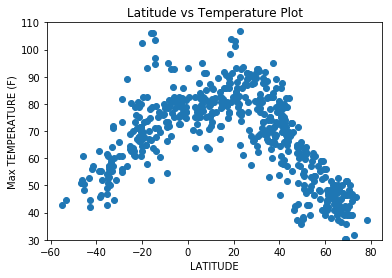

In [22]:
f1=plt.scatter(lat,temp)
plt.ylabel('Max TEMPERATURE (F)')
plt.xlabel('LATITUDE')
plt.ylim(30,110)
plt.title('Latitude vs Temperature Plot')
corr=sts.pearsonr(temp,lat);
corr

plt.savefig('LatvsTemp')

### We can see that temperature rises as we move towards the equator and goes down as we move away

### LATITUDE VS HUMIDITY

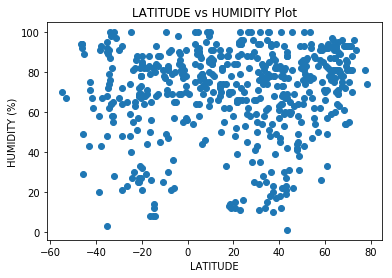

In [23]:
plt.scatter(lat,humidity)
plt.ylabel('HUMIDITY (%)')
plt.xlabel('LATITUDE')
plt.title('LATITUDE vs HUMIDITY Plot')
corr=sts.pearsonr(humidity,lat);
corr
plt.savefig('LatvsHum')

### Since p-value <<< , results are statistically significant, therfore it is difficult to determine relationship between latitude and humidity

### LATITUDE VS CLOUDINESS

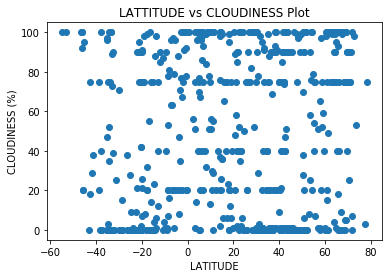

In [24]:
plt.scatter(lat,cloudiness)
plt.ylabel('CLOUDINESS (%)')
plt.xlabel('LATITUDE')
plt.title('LATTITUDE vs CLOUDINESS Plot')
corr=sts.pearsonr(cloudiness,lat);
corr
plt.savefig('LatvsCloud')

### Cloudiness is evenly spread and symmetrical in patterns in the northen and southern hemisphere

### LATITUDE VS WIND SPEED

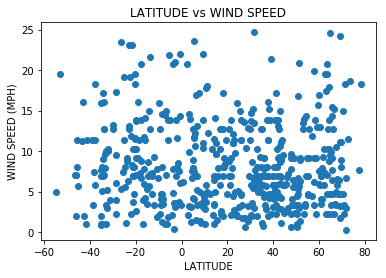

In [25]:
plt.scatter(lat,wind_speed)
plt.xlabel('LATITUDE')
plt.ylabel('WIND SPEED (MPH)')
plt.title('LATITUDE vs WIND SPEED')
corr=sts.pearsonr(wind_speed,lat);
corr
plt.savefig('LatvsWind')

###  Above code is analyzing wind speed across the northen and southern hemisphere

In [26]:
#Separating NORTHEN AND SOUTHERN HEMISPHERES
df_south=df_cities[df_cities['Latitude'] < 0]
df_north=df_cities[df_cities['Latitude'] >= 0]

In [27]:
#Generating variables for latitdues
lat_s=df_south['Latitude']
lat_n=df_north['Latitude']

In [28]:
#Generating variables for required entities for regression
temp_n=df_north['Max_Temp']
temp_s=df_south['Max_Temp']
hum_n=df_north['Humidity']
hum_s=df_south['Humidity']
cloud_n=df_north['Cloudiness']
cloud_s=df_south['Cloudiness']
wind_n=df_north['Wind Speed']
wind_s=df_south['Wind Speed']

### Regression Analysis

### Latitude (N) vs Max Temp

In [29]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),temp_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.68x + 93.08'

Text(0, 0.5, 'Max Temp (F)')

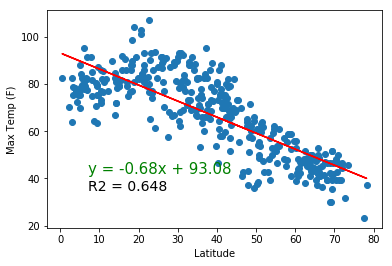

In [30]:
plt.scatter(lat_n,temp_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(7,42),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(7,35),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

### Temperature drops as we move away from the equator

### Latitude (S) vs Max Temp

In [31]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),temp_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.75x + 84.62'

In [32]:
rvalue

0.7260678612654176

Text(0, 0.5, 'Max Temp (F)')

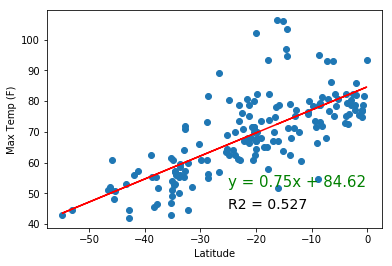

In [33]:
plt.scatter(lat_s,temp_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-25,52),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-25,45),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

### Temperature rises as we move towards the equator

### Latitude (N) vs Humidity

In [34]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),hum_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.06x + 68.48'

Text(0, 0.5, 'Humidity')

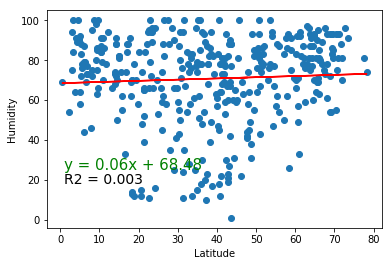

In [35]:
plt.scatter(lat_n,hum_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(1,25),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(1,18),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

### Humidity very slightly rises or remains constant as we move away from the equator based on line equation

### Latitude (S) vs Humidity

In [36]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),hum_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.02x + 65.59'

Text(0, 0.5, 'Humidity')

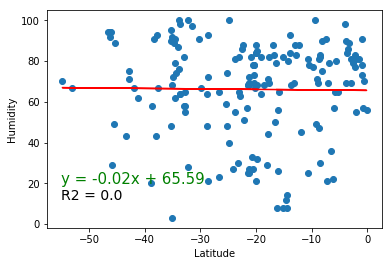

In [37]:
plt.scatter(lat_s,hum_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-55,20),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-55,12),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

### Humidty reduces based on line equaiton as we move towards equator

### Latitude(N) vs Cloudiness

In [38]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),cloud_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.02x + 50.52'

Text(0, 0.5, 'Cloudiness')

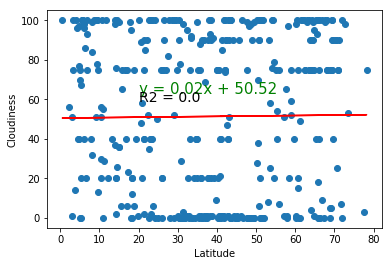

In [39]:
plt.scatter(lat_n,cloud_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(20,63),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(20,59),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

### Cloudiness more or less remains constant, latitude has very little affect on it in the northen hemisphere

### Latitude (S) vs Cloudiness

In [40]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),cloud_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.14x + 45.35'

Text(0, 0.5, 'Cloudiness')

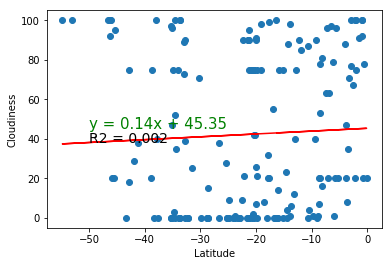

In [41]:
plt.scatter(lat_s,cloud_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-50,45),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-50,38),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

### Cloudiness tends to rise as we move towrards equator from the Southern Hemisphere

### Latitude (N) vs Wind Speed

In [42]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),wind_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.01x + 7.5'

Text(0, 0.5, 'Wind Speed mph')

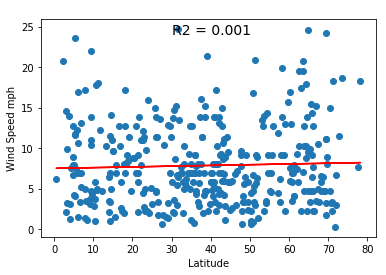

In [43]:
plt.scatter(lat_n,wind_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(30,26),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(30,24),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

### As per the line eq- latitude hardly contributes to the wind speed in the northen hemisphere

### Latitude (S) vs Wind Speed

In [44]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),wind_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.0x + 8.98'

Text(0, 0.5, 'Wind Speed mph')

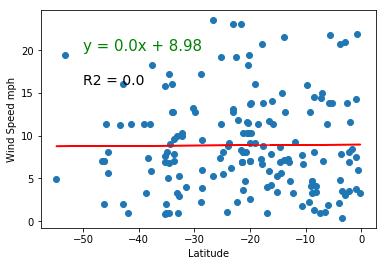

In [45]:
plt.scatter(lat_s,wind_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-50,20),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-50,16),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

### Wind speed is greater away from the equator in the southern hemisphere